In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
np.random.seed(42)

In [98]:
num_loans = 100

In [99]:
# Simulated loan portfolio Data
data = {
    "Loan ID": range(1, num_loans + 1),
    "Borrower": [f"Company {i}" for i in range(1, num_loans + 1)],
    "Loan Amount ($M)": np.random.randint(10, 100, size=num_loans),  # Loan amounts between $10M-$100M
    "Interest Rate (%)": np.random.uniform(3, 10, size=num_loans).round(2),  # Interest rates from 3% to 10%
    "Maturity Date": pd.date_range(start="2025-01-01", periods=num_loans, freq="M"),  # Monthly maturities
    "Credit Rating": np.random.choice(["AAA", "AA", "A", "BBB", "BB", "B"], size=num_loans),
    "Tranche": np.random.choice(["Senior", "Mezzanine", "Equity"], size=num_loans, p=[0.5, 0.3, 0.2]), # Probabilities for tranches
    "Default Probability (%)": np.random.uniform(1, 15, size=num_loans).round(2),  # 1%-15% default risk
    "Recovery Rate (%)": np.random.randint(30, 70, size=num_loans)  # Recovery rates from 30%-70%
}


In [100]:
df = pd.DataFrame(data)

In [101]:
# Define the file path
file_path = r"C:\Users\ladga\OneDrive - Case Western Reserve University\Desktop\Projects\NB\Fake_CLO_Dataset.csv"

df.to_csv("Fake_CLO_Dataset.csv", index=False)

print("Synthetic CLO dataset created successfully!")

Synthetic CLO dataset created successfully!


In [102]:
df = pd.read_csv("Fake_CLO_Dataset.csv")

In [103]:
print(df)

    Loan ID     Borrower  Loan Amount ($M)  Interest Rate (%) Maturity Date  \
0         1    Company 1                61               3.11    2025-01-31   
1         2    Company 2                24               5.96    2025-02-28   
2         3    Company 3                81               5.76    2025-03-31   
3         4    Company 4                70               5.05    2025-04-30   
4         5    Company 5                30               3.10    2025-05-31   
..      ...          ...               ...                ...           ...   
95       96   Company 96                50               8.72    2032-12-31   
96       97   Company 97                38               8.59    2033-01-31   
97       98   Company 98                24               4.06    2033-02-28   
98       99   Company 99                54               6.56    2033-03-31   
99      100  Company 100                74               7.87    2033-04-30   

   Credit Rating    Tranche  Default Probability (%

In [104]:
# 1️⃣ Weighted Average Spread (WAS)
df['Weighted_Spread'] = df['Loan Amount ($M)'] * df['Interest Rate (%)']
WAS = df['Weighted_Spread'].sum() / df['Loan Amount ($M)'].sum()

In [105]:
# 2️⃣ Weighted Average Life (WAL)
df['Loan_Life'] = pd.to_datetime(df['Maturity Date']).dt.year - 2024
df['Weighted_Life'] = df['Loan Amount ($M)'] * df['Loan_Life']
WAL = df['Weighted_Life'].sum() / df['Loan Amount ($M)'].sum()

In [106]:
# 3️⃣ Overcollateralization (OC) Ratio
total_loan_value = df['Loan Amount ($M)'].sum()
total_tranche_debt = df[df['Tranche'] != 'Equity']['Loan Amount ($M)'].sum()
OC_ratio = total_loan_value / total_tranche_debt

In [107]:
# 4️⃣ Interest Coverage (IC) Ratio
portfolio_interest_income = (df['Loan Amount ($M)'] * df['Interest Rate (%)']).sum()
tranche_interest_payments = df[df['Tranche'] != 'Equity']['Weighted_Spread'].sum()
IC_ratio = portfolio_interest_income / tranche_interest_payments

In [108]:
# Print Results
print(f"Weighted Average Spread (WAS): {WAS:.2f}%")
print(f"Weighted Average Life (WAL): {WAL:.2f} years")
print(f"Overcollateralization (OC) Ratio: {OC_ratio:.2f}")
print(f"Interest Coverage (IC) Ratio: {IC_ratio:.2f}")

Weighted Average Spread (WAS): 6.28%
Weighted Average Life (WAL): 4.71 years
Overcollateralization (OC) Ratio: 1.31
Interest Coverage (IC) Ratio: 1.30


In [109]:
# Export to Excel Report
df.to_excel("CLO_Performance_Report.xlsx", index=False)

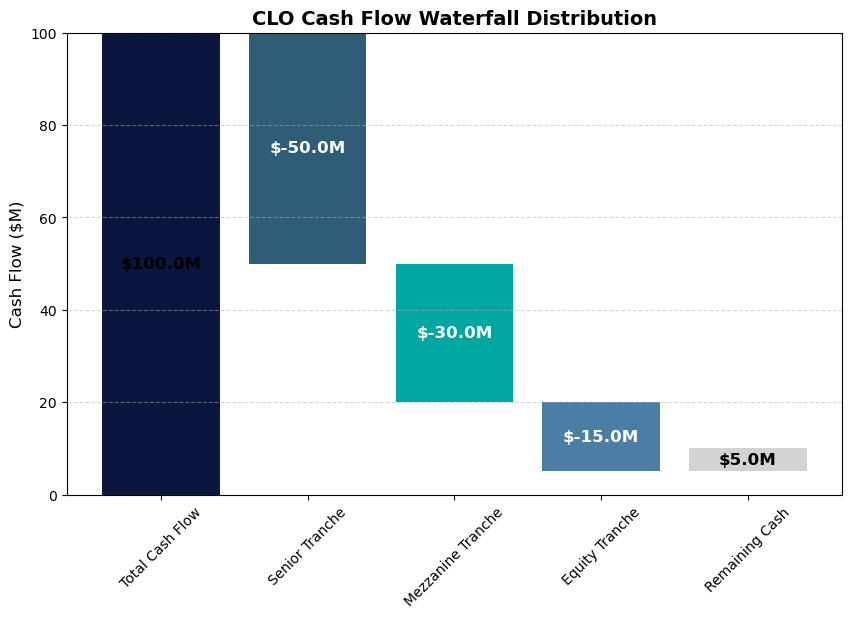

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories (Cash Flow Stages)
categories = ["Total Cash Flow", "Senior Tranche", "Mezzanine Tranche", "Equity Tranche", "Remaining Cash"]
values = [100, -50, -30, -15, 5]  # Negative values show cash deductions

# Calculate cumulative values to position the bars correctly
cumulative_values = np.cumsum([0] + values[:-1])  # Start from zero
final_values = cumulative_values + values

# Define custom colors from the image
colors = ["#0A163D", "#2F5C77", "#00A7A0", "#4A7EA5", "#D3D3D3"]  # Navy, Dark Blue, Teal, Blue-Grey, Light Grey

plt.figure(figsize=(10, 6))

# Draw waterfall bars with custom colors
for i in range(len(values)):
    plt.bar(categories[i], values[i], bottom=cumulative_values[i], color=colors[i])
    
    # Add text label on top of each bar
    y_position = cumulative_values[i] + values[i] / 2  # Position the label at the center of the bar
    
    # Format the number to 1 decimal place and add "M" (e.g., "$50.0M")
    formatted_value = f"${values[i]:,.1f}M"
    
    # Adjust text color based on value
    text_color = 'white' if values[i] < 0 else 'black'
    
    plt.text(i, y_position, formatted_value, ha='center', va='center', fontsize=12, color=text_color, fontweight='bold')

# Labels and styling
plt.title("CLO Cash Flow Waterfall Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Cash Flow ($M)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the figure as an image
plt.savefig("CLO_Cash_Flow_Waterfall.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.savefig("CLO_Cash_Flow_Waterfall.pdf", dpi=300, bbox_inches='tight')  # Save as PDF

# Show plot
plt.show()
